<a href="https://colab.research.google.com/github/LIZZETHGOMEZ/Data-Sciene-BEDU-Santander-2021/blob/main/Analisis%20de%20Datos%20con%20Python/Sesion_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sesión 7: Pruebas A/B y Procesamiento de Lenguaje Natural

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/drive/MyDrive/datasets_BEDU/Remoto ab_test-sales_pipeline.csv")
df.head()

,test,conversion,no conversion
0,B,0,1
1,A,0,1
2,A,0,1
3,A,0,1
4,A,0,1


In [6]:
total_count = df.groupby('test')[['conversion', 'no conversion']].sum()
total_count

,conversion,no conversion
test,,
A,198,23541
B,184,22404


In [8]:
total_count['sucess_rate'] = total_count['conversion']/(total_count['conversion'] + total_count['no conversion'])
total_count

,conversion,no conversion,sucess_rate
test,,,
A,198,23541,0.008341
B,184,22404,0.008146


In [18]:
diferencia_en_proporcion = 1-(total_count.loc['B']['sucess_rate']/total_count.loc['A']['sucess_rate'])
print(f"El test A fue {diferencia_en_proporcion*100:.2f}% mejor que B para generar ventas")

El test A fue 2.34% mejor que B para generar ventas


In [19]:
value_counts = df['test'].value_counts()
value_counts

A    23739
B    22588
Name: test, dtype: int64

In [22]:
# Prueba de Permutacion
# Guardamos en diferentes listas cuantos convergen en a y cuantos no convergen en a igual para b

conv_a = []
no_conv_a = []
conv_b = []
no_conv_b =[]

for i in range(1000):
  a = df.sample(value_counts.loc['A'], replace = False)
  conv_a.append(a['conversion'].sum())
  no_conv_a.append(a['no conversion'].sum())

  b = df.loc[~df.index.isin(a.index)]
  conv_b.append(b['conversion'].sum())
  no_conv_b.append(b['no conversion'].sum())


In [24]:
results = pd.DataFrame({
    'conv_a': conv_a,
    'no_conv_a': no_conv_a,
    'conv_b': conv_b,
    'no_conv_b': no_conv_b
})

results

,conv_a,no_conv_a,conv_b,no_conv_b
0,183,23556,199,22389
1,174,23565,208,22380
2,190,23549,192,22396
3,196,23543,186,22402
4,193,23546,189,22399
...,...,...,...,...
995,194,23545,188,22400
996,173,23566,209,22379
997,191,23548,191,22397
998,188,23551,194,22394


In [25]:
results['a_conv_rate'] = results['conv_a'] /(results['conv_a'] + results['no_conv_a'])
results['b_conv_rate'] = results['conv_b'] /(results['conv_b'] + results['no_conv_b'])
results['diff'] = 1 - (results['b_conv_rate'] / results['a_conv_rate'])

results


,conv_a,no_conv_a,conv_b,no_conv_b,a_conv_rate,b_conv_rate,diff
0,183,23556,199,22389,0.007709,0.008810,-0.142843
1,174,23565,208,22380,0.007330,0.009208,-0.256316
2,190,23549,192,22396,0.008004,0.008500,-0.062019
3,196,23543,186,22402,0.008256,0.008234,0.002664
4,193,23546,189,22399,0.008130,0.008367,-0.029175
...,...,...,...,...,...,...,...
995,194,23545,188,22400,0.008172,0.008323,-0.018452
996,173,23566,209,22379,0.007288,0.009253,-0.269652
997,191,23548,191,22397,0.008046,0.008456,-0.050956
998,188,23551,194,22394,0.007919,0.008589,-0.084497


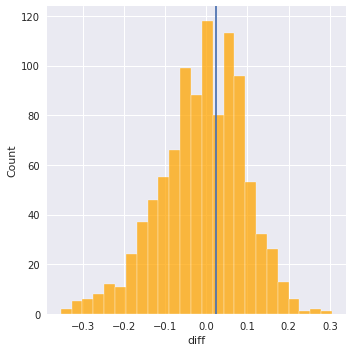

In [50]:
#graficamos
sns.set_style('darkgrid')
sns.displot(results['diff'], color = 'orange')
plt.axvline(diferencia_en_proporcion);

In [45]:
(results['diff'] >= diferencia_en_proporcion).sum() / results.shape[0] *100

42.3

## Expresiones regulares: Regex

In [51]:
import pandas as pd
import re